In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/02-kmeans/01-datasets/Mall_Customers.csv'

df_customers = pd.read_csv(file)

print(df_customers.info())
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(1) Feature Scaling

In [3]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
scaled_data_df = pd.DataFrame(scaled_data, index=df_customers.index, columns=('Age', 'Annual Income (k$)', 'Spending Score (1-100)'))

scaled_data_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


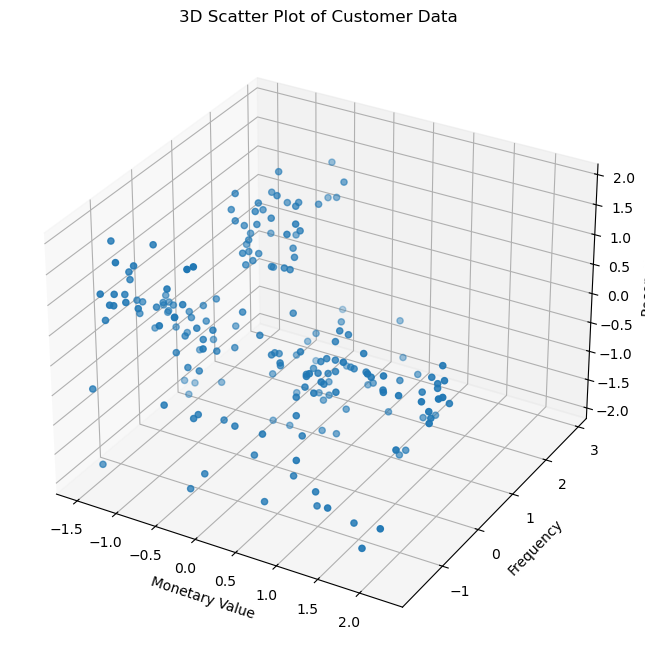

In [4]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["Age"], scaled_data_df["Annual Income (k$)"], scaled_data_df["Spending Score (1-100)"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

(2) K Means Clustering Evaluation

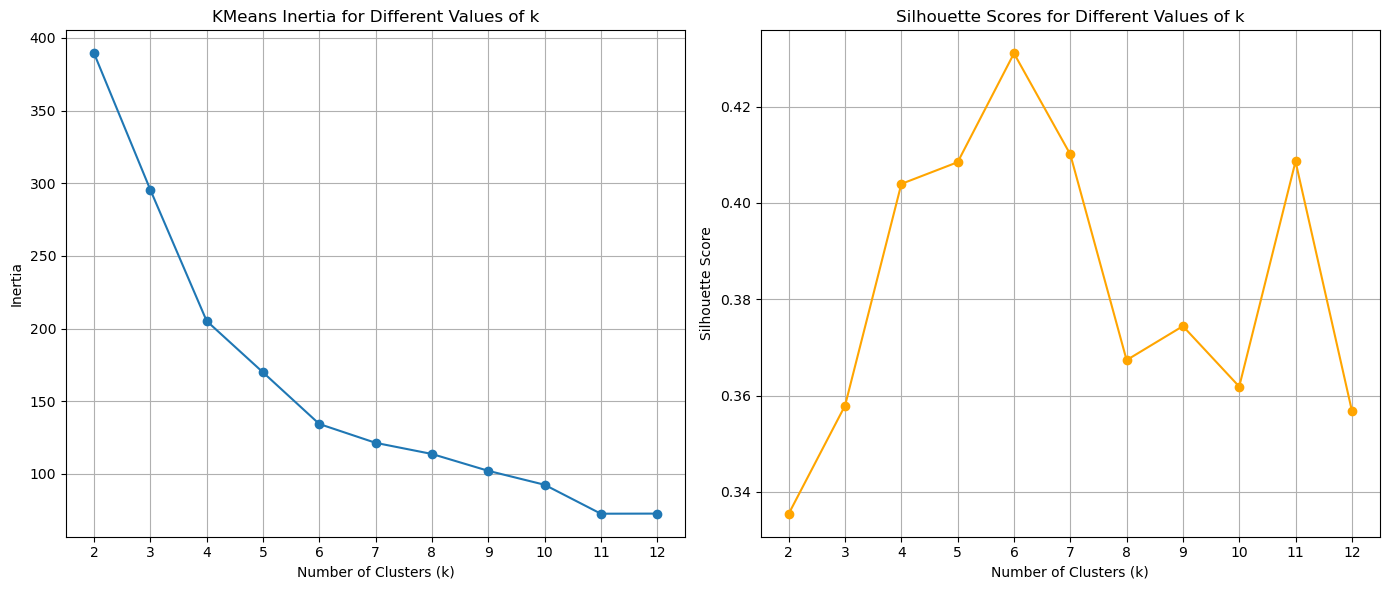

In [5]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

(3) K Means Clustering Final

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)
df_customers["Cluster"] = cluster_labels

In [9]:
import plotly.express as px

# Asegúrate de que los clusters sean int
df_customers['Cluster'] = df_customers['Cluster'].astype(int)

# Mapea colores personalizados
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green
    3: '#d62728'   # Red
}

df_customers['Color'] = df_customers['Cluster'].map(cluster_colors)

# Crear gráfico interactivo más grande
fig = px.scatter_3d(
    df_customers,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='Cluster',
    color_discrete_map=cluster_colors,
    title='3D Scatter Plot of Customer Data by Cluster',
    hover_data=['Cluster']
)

fig.update_traces(marker=dict(size=5))

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Spending Score (1-100)'
    ),
    width=1000,  # Anchura del gráfico
    height=800,  # Altura del gráfico
    margin=dict(l=0, r=0, b=0, t=40)  # Márgenes para mayor área útil
)

fig.show()

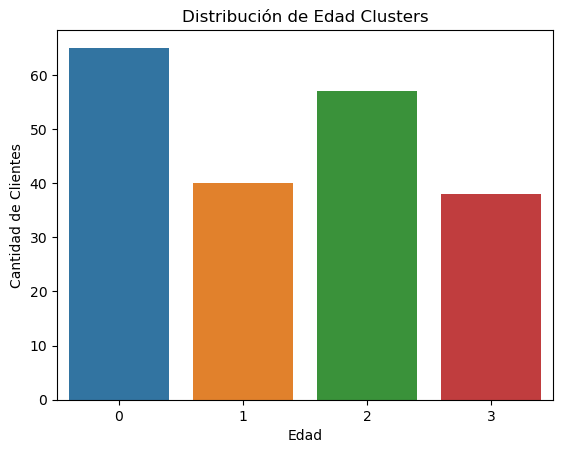

In [24]:
sns.countplot(data=df_customers, x='Cluster')
plt.title('Distribución de Edad Clusters')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

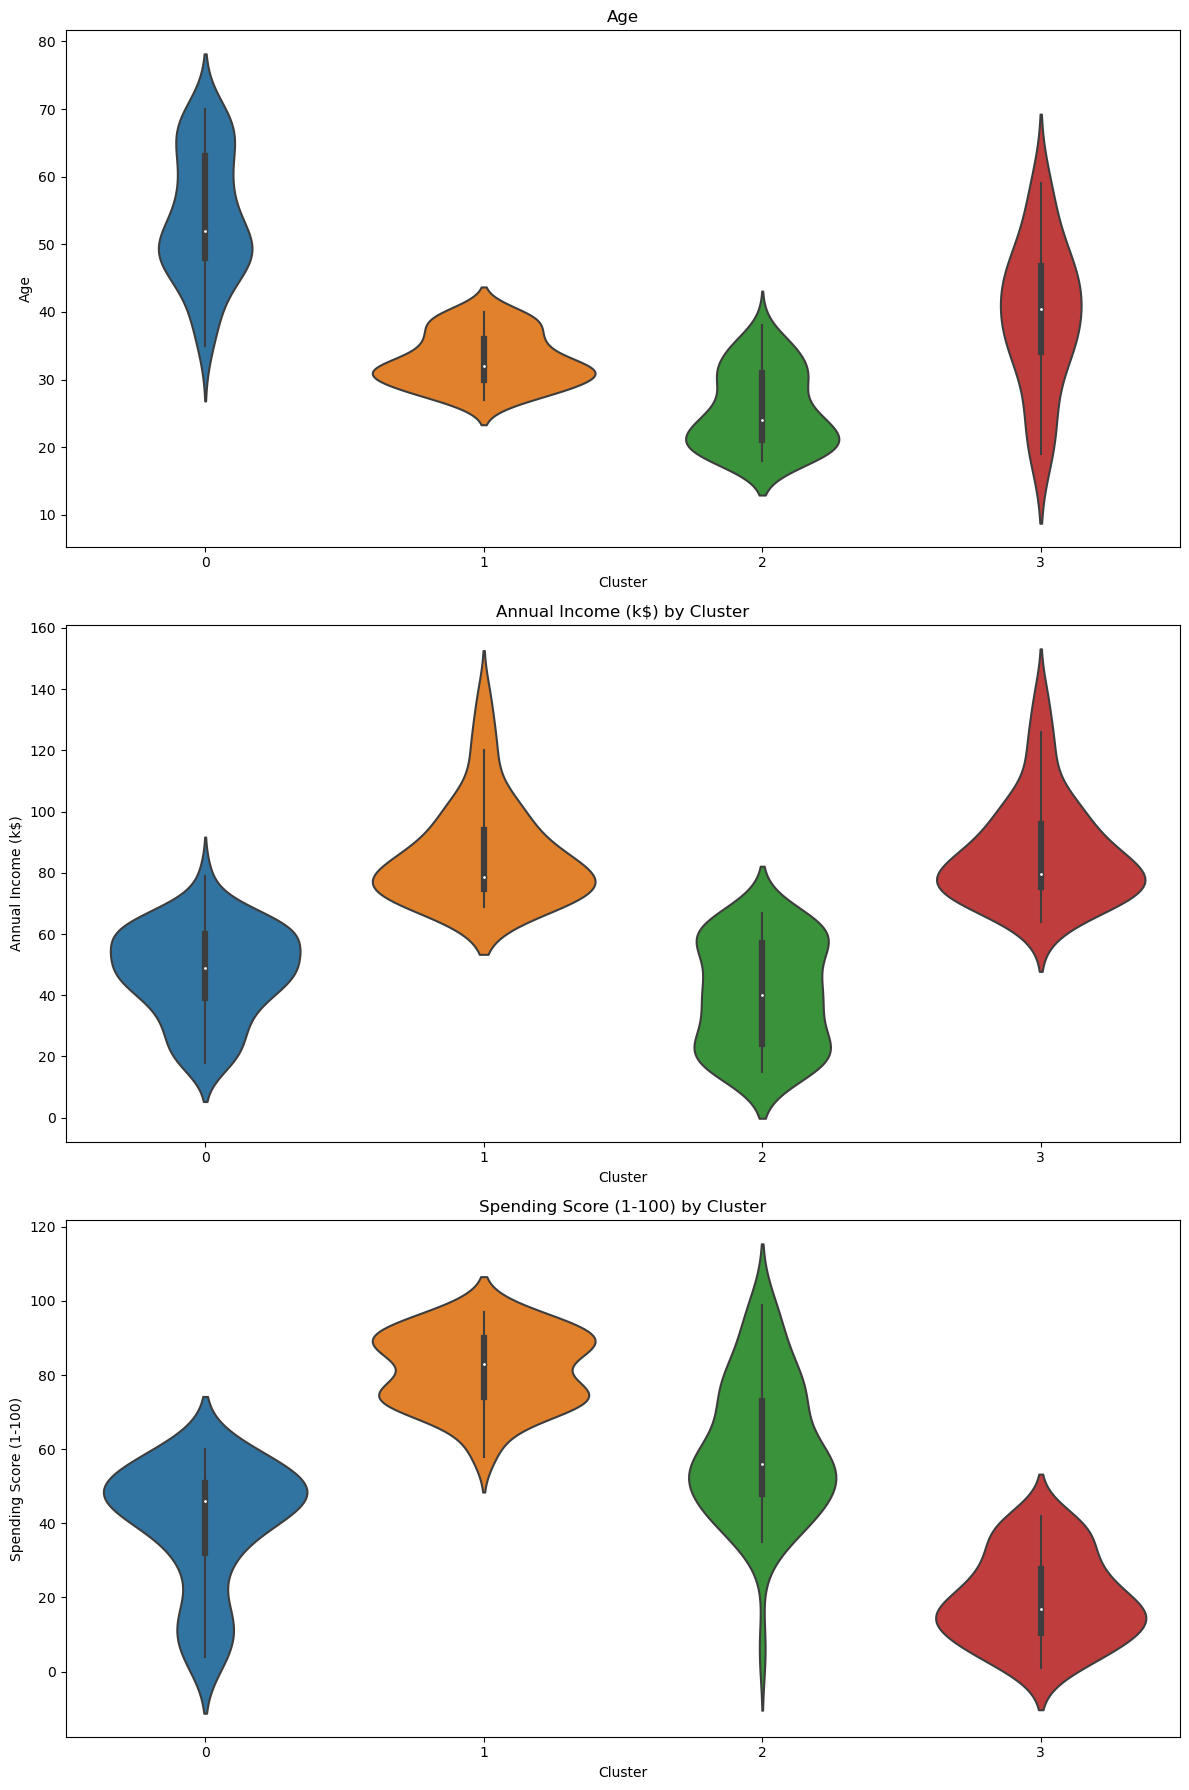

In [22]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=df_customers['Cluster'], y=df_customers['Age'], palette=cluster_colors)
#sns.violinplot(y=df_customers['Age'], color='gray', linewidth=1.0)
plt.title('Age')
plt.ylabel('Age')

plt.subplot(3, 1, 2)
sns.violinplot(x=df_customers['Cluster'], y=df_customers['Annual Income (k$)'], palette=cluster_colors)
#sns.violinplot(y=df_customers['Annual Income (k$)'], color='gray', linewidth=1.0)
plt.title('Annual Income (k$) by Cluster')
plt.ylabel('Annual Income (k$)')


plt.subplot(3, 1, 3)
sns.violinplot(x=df_customers['Cluster'], y=df_customers['Spending Score (1-100)'], palette=cluster_colors)
#sns.violinplot(y=df_customers['Spending Score (1-100)'], color='gray', linewidth=1.0)
plt.title('Spending Score (1-100) by Cluster')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()